
MCTA 4362: Machine Learning

Mini Project - Facial Expression Recognition and Analysis

Name: **NOORUL GHOUSIAH BINTI NOORDEEN SAHIB**   Matric No: **2118298**

Name: **NURAIN AINAA AQILAH BINTI ROSLI**   Matric No: **2114650**

# **import library and DATA**

In [ ]:
#!pip uninstall tf-keras -y

Found existing installation: tf_keras 2.15.1
Uninstalling tf_keras-2.15.1:
  Successfully uninstalled tf_keras-2.15.1


In [1]:
# Import necessary libraries
import numpy as np
import os
from google.colab import drive


# Check and optionally upgrade TensorFlow
import tensorflow as tf

# Check if the TensorFlow version is different from 2.15.1
if tf.__version__ != '2.15.1':
    # Use os.system to run the pip install command
    os.system('pip install tensorflow==2.15.1')
    # Re-import TensorFlow after upgrading
    import tensorflow as tf

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.15.0


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pickle
from google.colab import files

In [ ]:
# Mount Google Drive
drive.mount('/content/drive/')

# Define the data generator with normalization
datagen = ImageDataGenerator(rescale=1./255)

# Define the directory for your dataset
train_data_dir = '/content/drive/My Drive/Colab Notebooks/MCTAmachinelearning/Facial_Expression_Dataset/train'  # Replace with your actual path
test_data_dir = '/content/drive/My Drive/Colab Notebooks/MCTAmachinelearning/Facial_Expression_Dataset/test'    # Replace with your actual path

# Create the training generator
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(48, 48),  # Image resolution
    color_mode='grayscale',  # Grayscale images
    batch_size=32,
    class_mode='categorical',
    shuffle=True  # Shuffle the data to ensure randomness
)

# Create the validation generator
test_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False # Shuffle the data to ensure randomness
)


In [ ]:
print("Classes:", train_generator.class_indices)
print("Classes:", test_generator.class_indices)

# Get a batch of images and labels
images, labels = next(train_generator)

# Print the class indices
print("Class indices (0: angry, 1: happy, 2: sad):", train_generator.class_indices)

# Print the labels of the batch
print("Labels of the batch:", labels)

# **code to determine pca component number**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

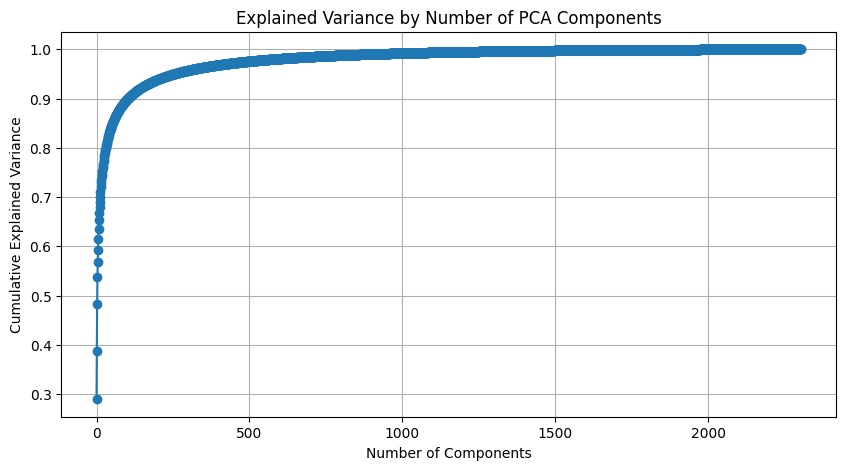

Number of components to retain 95% variance: 256


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


# Aggregate data for PCA fitting
X_aggregate = []
num_batches = len(train_generator)  # Total number of batches

for i in range(num_batches):
    X_batch, _ = next(train_generator)
    X_batch = X_batch.reshape(X_batch.shape[0], -1)  # Flatten images
    X_aggregate.append(X_batch)

# Stack all batches into a single array
X_aggregate = np.vstack(X_aggregate)

# Fit PCA to the aggregated data without specifying n_components
pca = PCA()
pca.fit(X_aggregate)

# Save PCA object to a file using pickle
with open('pca_modelallevery.pkl', 'wb') as f:
    pickle.dump(pca, f)

# Download the file automatically
files.download('pca_modelallevery.pkl')

# Calculate cumulative explained variance
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(10, 5))
plt.plot(explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of PCA Components')
plt.grid(True)

# Save the plot as an image file
plt.savefig('explained_variance_plot.png')

# Show the plot
plt.show()

# Determine the number of components needed to preserve 95% variance
n_components_95 = np.argmax(explained_variance_ratio >= 0.95) + 1
output_text = f'Number of components to retain 95% variance: {n_components_95}'
print(output_text)

# Save the number of components to a text file
with open('n_components.txt', 'w') as f:
    f.write(output_text)

# Download the files
files.download('explained_variance_plot.png')
files.download('n_components.txt')


# **code to get PCA model, X_train, and X_test pca**

In [ ]:
# Aggregate data for PCA fitting
X_aggregate = []
num_batches = len(train_generator)  # Total number of batches

for i in range(num_batches):
    X_batch, _ = next(train_generator)
    X_batch = X_batch.reshape(X_batch.shape[0], -1)  # Flatten images
    X_aggregate.append(X_batch)

# Stack all batches into a single array
X_aggregate = np.vstack(X_aggregate)

# Create a PCA object and fit on aggregated data
pca = PCA(n_components=256)  # Adjust n_components as needed
pca.fit(X_aggregate)

# Save PCA object to a file using pickle
with open('pca_modelall256.pkl', 'wb') as f:
    pickle.dump(pca, f)


# Download the file automatically
files.download('pca_modelall256.pkl')

#########################################################################################################################
# Transform training and test data using PCA
def transform_with_pca(generator, pca):
    features = []
    labels = []
    for inputs_batch, labels_batch in generator:
        inputs_batch = inputs_batch.reshape(inputs_batch.shape[0], -1)
        features_batch = pca.transform(inputs_batch)
        features.append(features_batch)
        labels.append(labels_batch)
        if generator.batch_index == 0:  # If we've looped back to the start
            break
    return np.vstack(features), np.vstack(labels)

# Extract features using PCA for training and testing
# Transform training data and test data using PCA
X_train_pca, y_train = transform_with_pca(train_generator, pca)
X_test_pca, y_test = transform_with_pca(test_generator, pca)

# Flatten y_train and y_test
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

# Save transformed training data and test data to files using pickle
with open('X_train_pca.pkl', 'wb') as f:
    pickle.dump(X_train_pca, f)

with open('y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)

with open('X_test_pca.pkl', 'wb') as f:
    pickle.dump(X_test_pca, f)

with open('y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)

# Download the transformed training data files automatically
files.download('X_train_pca.pkl')
files.download('y_train.pkl')
files.download('X_test_pca.pkl')
files.download('y_test.pkl')

# Print shapes of transformed data
print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test_pca:", X_test_pca.shape)
print("Shape of y_test:", y_test.shape)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Shape of X_train_pca: (28687, 256)
Shape of y_train: (28687,)
Shape of X_test_pca: (7178, 256)
Shape of y_test: (7178,)


# **Load pca model, and pre-processed data**

In [ ]:
# Load PCA object from a file using pickle
pca_filename = 'pca_modelall256.pkl'
with open(pca_filename, 'rb') as f:
    pca = pickle.load(f)

print("PCA model loaded successfully.")

# Load the transformed training data from the files
with open('X_train_pca.pkl', 'rb') as f:
    X_train_pca = pickle.load(f)

with open('y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('X_test_pca.pkl', 'rb') as f:
    X_test_pca = pickle.load(f)

with open('y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

print("Data loaded successfully.")

PCA model loaded successfully.
Data loaded successfully.


# **Check Data**


In [ ]:
X_train = X_train_pca
X_test = X_test_pca

print(X_train)
print(y_train)
print(X_test)
print(y_test)

# Print shapes of transformed data
print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test_pca:", X_test_pca.shape)
print("Shape of y_test:", y_test.shape)

[[ 2.7301149e+00  8.9140928e-01 -1.0192183e+00 ... -7.8015424e-02
  -7.2783566e-01 -1.3090858e-01]
 [-4.0399151e+00 -3.0013263e+00 -5.9830058e-01 ...  2.3735748e-01
   2.3345456e-01 -2.1259159e-01]
 [-3.7325301e+00  5.8089318e+00 -4.0280480e+00 ...  5.1998209e-02
   2.7392960e-01 -8.5857414e-02]
 ...
 [-1.2246681e+01 -1.9590911e+00  2.8437362e+00 ...  7.6953703e-01
  -1.4190210e-01  5.6862617e-01]
 [ 4.1878781e+00 -1.4422684e+00 -7.9910499e-01 ...  4.7261977e-01
   2.8496182e-01  8.5668981e-02]
 [ 7.7319980e-01  3.6835861e+00  1.1448846e+00 ... -8.6567923e-04
   2.3725437e-01 -1.2118408e-02]]
[5 0 4 ... 4 0 4]
[[ 6.3673604e-01  1.5828915e+00  3.3221254e-01 ... -1.7834462e-02
  -3.0685434e-01 -6.8833554e-01]
 [-1.7382718e+00  1.6708496e+00  4.2163553e+00 ...  3.9856307e-02
  -6.3776457e-01  3.4992054e-01]
 [ 8.6114635e+00 -3.9158418e+00 -2.8323722e+00 ... -6.1401315e-02
   1.5257850e-01 -4.4196984e-01]
 ...
 [-9.7275978e-01 -2.6660421e+00  1.6038079e+00 ... -3.2666463e-02
  -3.4043899e-

# **Choose Suitable Supervised Classification**

In [ ]:
# Import necessary libraries
import pickle
from google.colab import files
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Reshape the target variable
y_train = y_train.ravel()

#--logistic regression
start_time = time.time()
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train, y_train)

# Save logistic regression model
with open('logistic_reg_model.pkl', 'wb') as f:
    pickle.dump(logistic_reg, f)
files.download('logistic_reg_model.pkl')

y_pred_probabilities = logistic_reg.predict_proba(X_test)  # Predicted probabilities for each class
y_pred_labels = logistic_reg.predict(X_test)  # Predicted class labels
end_time = time.time()
regressiontime = end_time - start_time
#----------------------------------------------------
#--KNN
start_time = time.time()
from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier(n_neighbors=5)
Knn.fit(X_train, y_train)

# Save KNN model
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(Knn, f)
files.download('knn_model.pkl')

y_pred_knn = Knn.predict(X_test)
end_time = time.time()
knntime = end_time - start_time
#------------------------------------


#--------------------------------------------------
#non-linear SVM
from sklearn.svm import SVC
start_time = time.time()
nonlinsvm = SVC(kernel='rbf', random_state=0)
nonlinsvm.fit(X_train, y_train)

# Save non-linear SVM model
with open('nonlinear_svm_model.pkl', 'wb') as f:
    pickle.dump(nonlinsvm, f)
files.download('nonlinear_svm_model.pkl')

y_pred_nlsvm = nonlinsvm.predict(X_test)
end_time = time.time()
svmtime = end_time - start_time
#----------------------------------------------
#--Naive Bayes
start_time = time.time()
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()
naive.fit(X_train, y_train)

# Save Naive Bayes model
with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(naive, f)
files.download('naive_bayes_model.pkl')

y_pred_nb = naive.predict(X_test)
end_time = time.time()
nbtime = end_time - start_time
#------------------------------------
#--decision tree
start_time = time.time()
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(X_train, y_train)

# Save decision tree model
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(tree, f)
files.download('decision_tree_model.pkl')

y_pred_tree = tree.predict(X_test)
end_time = time.time()
dttime = end_time - start_time
#---------------------------------------------
#--random forest
start_time = time.time()
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=0)
forest.fit(X_train, y_train)

# Save random forest model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(forest, f)
files.download('random_forest_model.pkl')

y_pred_forest = forest.predict(X_test)
end_time = time.time()
rftime = end_time - start_time
#----------------------------------------------------

print(f"Training and prediction time of linear regression: {regressiontime} seconds")
print(f"Training and prediction time of KNN: {knntime} seconds")
print(f"Training and prediction time of Non-Linear SVM: {svmtime} seconds")
print(f"Training and prediction time of Naive Bayes: {nbtime} seconds")
print(f"Training and prediction time of Decision Tree: {dttime} seconds")
print(f"Training and prediction time of Random Forest: {rftime} seconds")
#----------------------------------------------------



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training and prediction time of linear regression: 5.521905899047852 seconds
Training and prediction time of KNN: 3.0493791103363037 seconds
Training and prediction time of Non-Linear SVM: 261.5727388858795 seconds
Training and prediction time of Naive Bayes: 0.08210301399230957 seconds
Training and prediction time of Decision Tree: 13.282026767730713 seconds
Training and prediction time of Random Forest: 500.00756549835205 seconds
--- Logistic Regression ---


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--- KNN ---


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--- Non-linear SVM ---


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--- Naive Bayes ---


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--- Decision Tree ---


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--- Random Forest ---


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Model Result Visualisation**

Accuracy of Logistic Regression: 0.38
Accuracy of KNN: 0.34
Accuracy of Non-linear SVM: 0.44
Accuracy of Naive Bayes: 0.34
Accuracy of Decision Tree: 0.31
Accuracy of Random Forest: 0.45


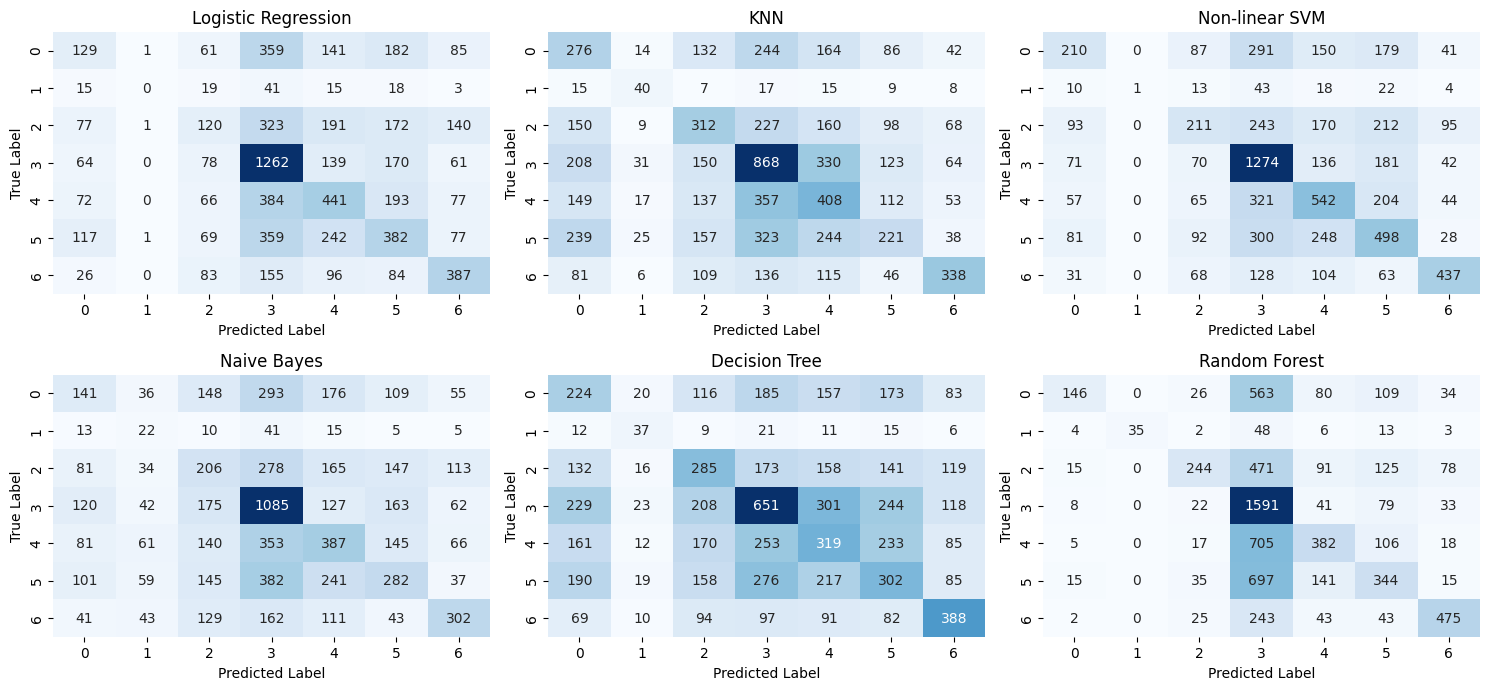

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score

classifier_names = ['Logistic Regression', 'KNN',
                    'Non-linear SVM', 'Naive Bayes', 'Decision Tree',
                    'Random Forest']

# Calculate accuracy for each classifier
accuracy_linreg = accuracy_score(y_test, y_pred_labels)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

accuracy_nlsvm = accuracy_score(y_test, y_pred_nlsvm)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_forest = accuracy_score(y_test, y_pred_forest)

# Define a list of accuracies
accuracies = [accuracy_linreg, accuracy_knn,
              accuracy_nlsvm, accuracy_nb, accuracy_tree,
              accuracy_forest]

# Print accuracies
for name, acc in zip(classifier_names, accuracies):
    print(f"Accuracy of {name}: {acc:.2f}")


# Calculate confusion matrices for each classifier
conf_matrix_linreg = confusion_matrix(y_test, y_pred_labels)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

conf_matrix_nlsvm = confusion_matrix(y_test, y_pred_nlsvm)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)

# Define a list of confusion matrices and corresponding classifier names
confusion_matrices = [conf_matrix_linreg, conf_matrix_knn,
                      conf_matrix_nlsvm, conf_matrix_nb, conf_matrix_tree,
                      conf_matrix_forest]


# Plot confusion matrices
plt.figure(figsize=(15, 10))
for i, conf_matrix in enumerate(confusion_matrices, 1):
    plt.subplot(3, 3, i)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(classifier_names[i-1])

plt.tight_layout()
plt.show()



# comparison between random forest vs SVM

In [ ]:
# Standardize the PCA-transformed data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Non-linear SVM Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.22      0.28       958
           1       1.00      0.01      0.02       111
           2       0.35      0.21      0.26      1024
           3       0.49      0.72      0.58      1774
           4       0.40      0.44      0.42      1233
           5       0.37      0.40      0.38      1247
           6       0.63      0.53      0.57       831

    accuracy                           0.44      7178
   macro avg       0.52      0.36      0.36      7178
weighted avg       0.44      0.44      0.42      7178

Non-linear SVM Training Time: 250.24 seconds
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.15      0.25       958
           1       1.00      0.32      0.48       111
           2       0.71      0.24      0.35      1024
           3       0.37      0.90      0.52      1774
           4

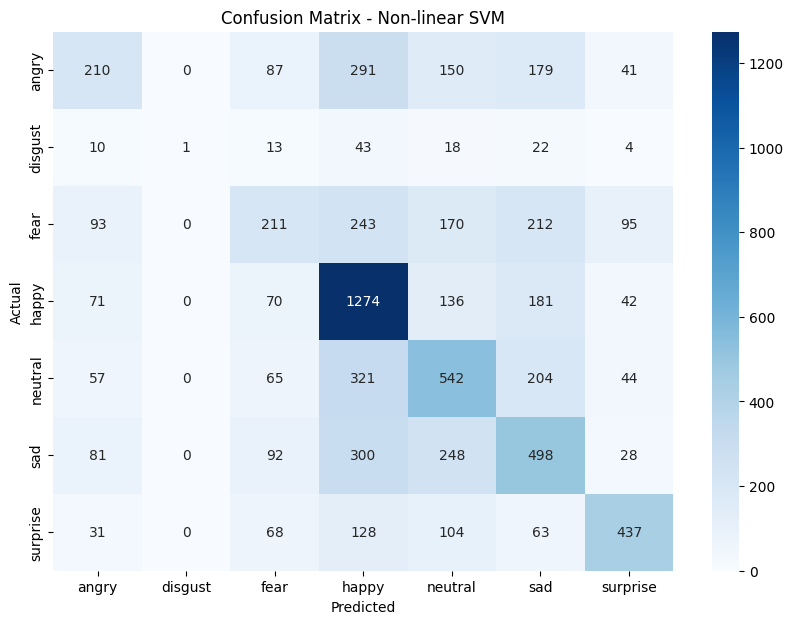

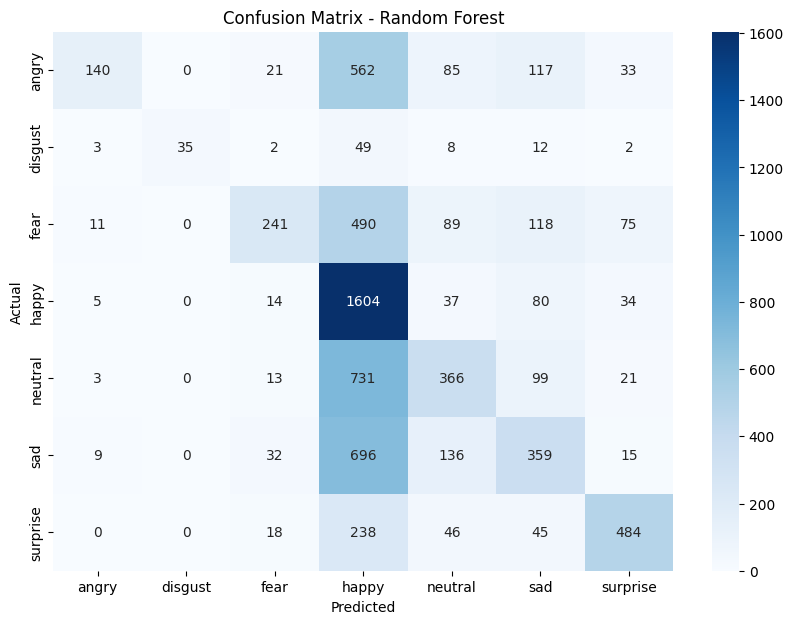

In [ ]:
# Assuming X_train_pca, y_train, X_test_pca, y_test are already defined and standardized

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import time

# Non-linear SVM
start_time = time.time()
nonlinsvm = SVC(kernel='rbf', random_state=0)
nonlinsvm.fit(X_train_pca, y_train)
end_time = time.time()
rbf_svm_time = end_time - start_time
y_pred_nlsvm = nonlinsvm.predict(X_test_pca)
print("Non-linear SVM Classification Report:")
print(classification_report(y_test, y_pred_nlsvm))
print(f"Non-linear SVM Training Time: {rbf_svm_time:.2f} seconds")

# Random Forest
start_time = time.time()
forest = RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=0)
forest.fit(X_train_pca, y_train)
end_time = time.time()
random_forest_time = end_time - start_time
y_pred_forest = forest.predict(X_test_pca)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_forest))
print(f"Random Forest Training Time: {random_forest_time:.2f} seconds")

# Confusion Matrix Visualization
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    'Non-linear SVM': y_pred_nlsvm,
    'Random Forest': y_pred_forest
}

for model_name, y_pred in models.items():
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
